# Exploring and testing the hypothesis with supervised Machine Learning

## Contents
__Importing libraries<br>
Resetting pandas options<br>
Defining 'path' variable<br>
Importing the cleaned, merged and checked dataframe<br>
Correlation matrix__<br>
__Testing hypothesis<br>
Formulating new hypthesis<br>
Supervised Machine learning__<br>
- Exploring the data visually<br>
- Reshaping the relevant variables to NumPy arrays <br>
- Splitting the data in to split and train sets<br>
- Regression analysis<br>


## Importing libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Resetting pandas options

In [2]:
# resetting pandas options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Defining 'path' variable

In [3]:
# defining path variable
path = r"C:\Users\khand\Desktop\Careerfoundry\Data Immersion\Achievement - 6\Project - IMF Data Analysis"

## Importing the cleaned, merged and checked dataframe

In [4]:
# importing datarame
df_cpi_pcps = pd.read_csv(os.path.join(path, '2. Data', 'Prepared Data', 'overall_cpi_pcps_merged_flagged_v2_csv.csv'), index_col = False)

In [5]:
# checking the imported dataframe
df_cpi_pcps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22752 entries, 0 to 22751
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   country_name                              22752 non-null  object 
 1   month_code                                22752 non-null  object 
 2   year                                      22752 non-null  int64  
 3   month_number                              22752 non-null  int64  
 4   consumer_price_index_all_items            22752 non-null  float64
 5   agr_raw_material_index                    22752 non-null  float64
 6   agriculture                               22752 non-null  float64
 7   all_index                                 22752 non-null  float64
 8   all_metals_ex_gold_index                  22752 non-null  float64
 9   all_metals_index                          22752 non-null  float64
 10  apsp_crude_oil_us_dollar_per_bbl  

## Correlation matrix

In [6]:
# correlation matrix
df_cpi_pcps[df_cpi_pcps['outlier_country_flag'] == 'Non-outlier country'].iloc[:, 4:23].corr()

,consumer_price_index_all_items,agr_raw_material_index,agriculture,all_index,all_metals_ex_gold_index,all_metals_index,apsp_crude_oil_us_dollar_per_bbl,beverages_index,coal_index,commodities_for_index_all_excluding_gold,energy_index,fertilizer,food_and_beverage_index,food_index,industrial_materials_index,metal_index,natural_gas_index,non_fuel_index,precious_metals_price_index
consumer_price_index_all_items,1.000000,-0.413985,-0.208990,-0.276416,-0.179193,-0.075450,-0.320313,-0.320450,-0.021920,-0.295090,-0.312213,-0.244047,-0.146387,-0.123532,-0.242009,-0.197726,-0.121505,-0.148400,0.165687
agr_raw_material_index,-0.413985,1.000000,0.809660,0.778798,0.772072,0.660754,0.691185,0.721820,0.546428,0.783500,0.720593,0.636683,0.716128,0.690088,0.846234,0.783045,0.437858,0.768298,0.264594
agriculture,-0.208990,0.809660,1.000000,0.913363,0.819017,0.778832,0.770019,0.718913,0.621219,0.904832,0.833436,0.782012,0.989458,0.981709,0.841596,0.816610,0.707810,0.926730,0.504264
all_index,-0.276416,0.778798,0.913363,1.000000,0.804448,0.743376,0.932679,0.621599,0.651720,0.998192,0.975637,0.854631,0.894040,0.889876,0.831209,0.810805,0.796825,0.875618,0.424567
all_metals_ex_gold_index,-0.179193,0.772072,0.819017,0.804448,1.000000,0.964351,0.614256,0.509477,0.664304,0.784467,0.672081,0.668266,0.783499,0.783426,0.990801,0.998478,0.513297,0.952653,0.647257
all_metals_index,-0.075450,0.660754,0.778832,0.743376,0.964351,1.000000,0.526404,0.437063,0.621029,0.709494,0.586836,0.649995,0.763178,0.769110,0.929800,0.950067,0.470958,0.955674,0.825505
apsp_crude_oil_us_dollar_per_bbl,-0.320313,0.691185,0.770019,0.932679,0.614256,0.526404,1.000000,0.468971,0.467868,0.943234,0.972000,0.730543,0.745189,0.746700,0.658059,0.626625,0.669799,0.680077,0.205740
beverages_index,-0.320450,0.721820,0.718913,0.621599,0.509477,0.437063,0.468971,1.000000,0.491062,0.626886,0.579959,0.676672,0.676851,0.620018,0.567557,0.514706,0.585931,0.602615,0.180895
coal_index,-0.021920,0.546428,0.621219,0.651720,0.664304,0.621029,0.467868,0.491062,1.000000,0.644941,0.593558,0.587570,0.603948,0.593920,0.672910,0.673605,0.682460,0.663750,0.361483
commodities_for_index_all_excluding_gold,-0.295090,0.783500,0.904832,0.998192,0.784467,0.709494,0.943234,0.626886,0.644941,1.000000,0.984031,0.847220,0.882734,0.877290,0.817265,0.793566,0.799867,0.851673,0.369556


Text(0.5, 1.0, 'Correlation matrix including the lagged variables')

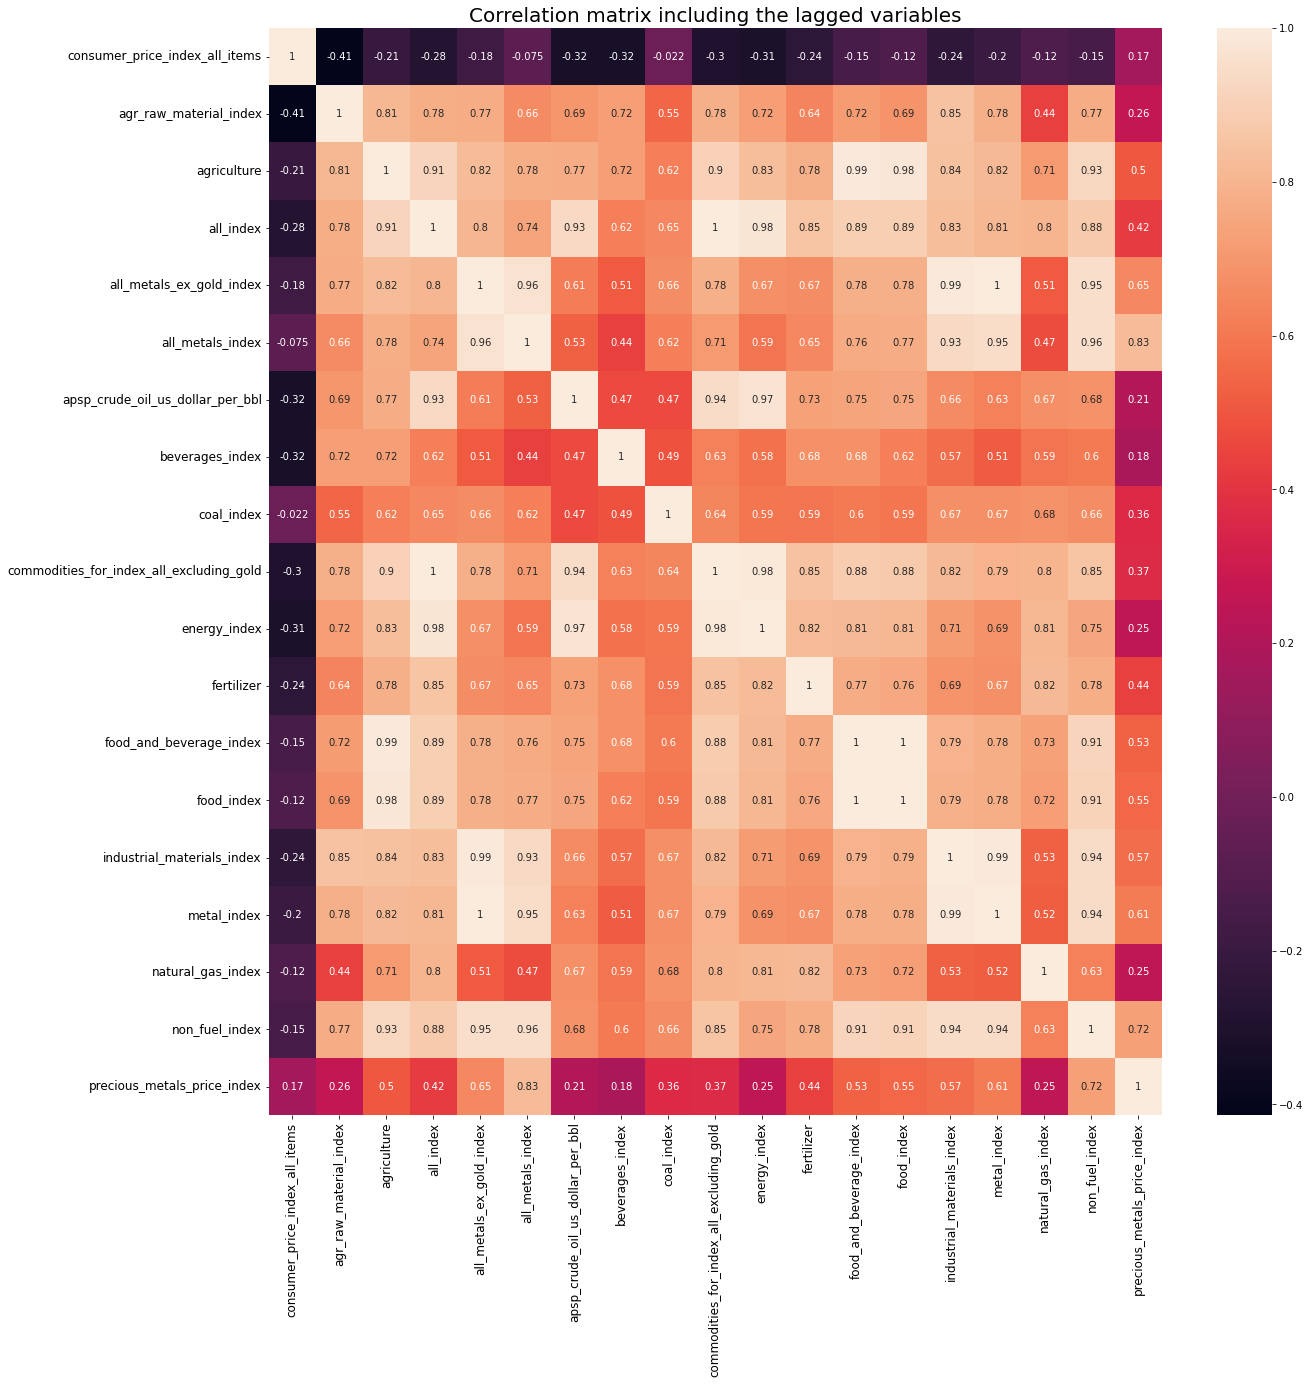

In [7]:
# correlation heatmap with seaborn
f,ax = plt.subplots(figsize = (20,20))
corr = sns.heatmap(df_cpi_pcps[df_cpi_pcps['outlier_country_flag'] == 'Non-outlier country'].iloc[:, 4:23].corr(), annot = True, annot_kws = {'size' : 10}, ax = ax)
ax.tick_params(labelsize = 12)
plt.title('Correlation matrix including the lagged variables', fontsize = 20)

## Supervised Machine learning

### Exploring the data visually

In [8]:
# dataframe excluding outlier countries
df_without_outliers = df_cpi_pcps[df_cpi_pcps['outlier_country_flag'] == 'Non-outlier country']

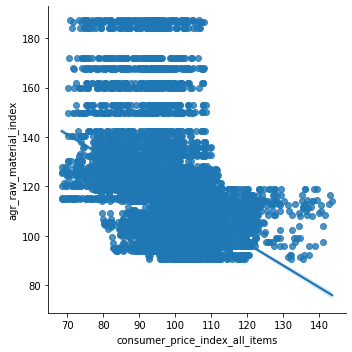

In [9]:
# creating scatterplot of the variables relevant to the hypothesis
scatter_1 = sns.lmplot(x = 'consumer_price_index_all_items', y = 'agr_raw_material_index', data = df_without_outliers)

A negative trend is visible between the two variables

### Reshaping the variables to NumPy arrays

In [10]:
# reshaping the variables relevant to the hypothesis
x = df_without_outliers.loc[:,'consumer_price_index_all_items'].values.reshape(-1,1)
y = df_without_outliers.loc[:,'agr_raw_material_index'].values.reshape(-1,1)

In [11]:
# checking x object
x

array([[ 82.36679722],
       [ 83.62307529],
       [ 83.69182171],
       ...,
       [102.79492515],
       [102.52191539],
       [102.73597081]])

In [12]:
# checking y object
y

array([[114.96306581],
       [115.22749061],
       [120.25894321],
       ...,
       [112.8290243 ],
       [116.29494094],
       [114.13314778]])

### Splitting the data in to split and train sets

In [13]:
# splitting the data into split and train sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

### Regression Analysis

In [14]:
# creating regression object
regression = LinearRegression()

In [15]:
# fitting the regression to the train set
regression.fit(x_train, y_train)

LinearRegression()

In [16]:
# predicting values of y based on x
y_predicted = regression.predict(x_test)

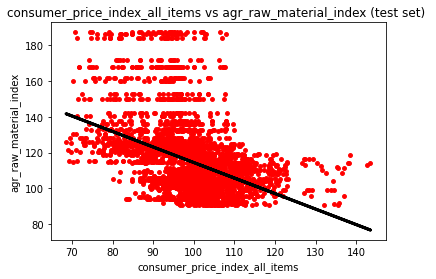

C:\Users\khand\AppData\Local\Temp\ipykernel_17908\2707467491.py:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_inch" which is no longer supported as of 3.3 and will become an error in 3.6
  plot_test.savefig(os.path.join(path, '4. Analysis', 'Linear regression line.jpeg'), bbox_inch = 'tight')


<Figure size 432x288 with 0 Axes>

In [21]:
# creating a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(x_test, y_test, color = 'red', s = 15)
plot_test.plot(x_test, y_predicted, color = 'black', linewidth = 3)
plot_test.title('consumer_price_index_all_items vs agr_raw_material_index (test set) ')
plot_test.xlabel('consumer_price_index_all_items')
plot_test.ylabel('agr_raw_material_index')
plot_test.show()

The regression line does ot fit well to the test data. A lot of data points are far away from the regression line.

In [18]:
# creating an object that contains model's summary statistics
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

# printing model's summary statistics
print('Slope: ', regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope:  [[-0.86753461]]
Mean squared error:  302.94986936937227
R2 score:  0.18718339363413106


In [19]:
# checking the variance in the y test set
y_test.std()

372.71614162002857

In [20]:
# checking the variance in the x test set
x_test.std()

82.01945108075648

The Mean squared error (302.95) is __not acceptable__ compared to the variance in the data<br>
The R2 score (0.187) is quite low which means that __the model is not a good fit at all__.<br>
__Therefore the hypothesis is cannot be proven.__<br>

In [21]:
# creating a datframe comparing the actual and predicted values of y
comparison_data = pd.DataFrame({'Actual' : y_test.flatten(), 'Predicted' : y_predicted.flatten()})
comparison_data.head(50)

,Actual,Predicted
0,107.773188,113.172830
1,93.881564,106.918423
2,115.227491,135.798089
3,102.703728,109.705875
4,94.957635,126.220551
5,100.149335,106.521980
6,106.782997,118.197178
7,105.409046,114.682341
8,161.744144,123.008938
9,105.565623,115.116108


As the model does not fit the data very well (R2 score: 0.187), the predicted values are significantly off from the actual values. Therefore, this has to be said that __the 'agr_raw_material_index' variable is not suitable for predicting 'consumer_price_index_all_items'__.